[
  {
    "iteration": 0,
    "status": {
      "0": 0,
      "1": 0,
      "2": 0,
      "3": 0,
      "4": 0,
      "5": 0,
      "6": 0,
      "7": 0,
      "8": 0,
      "9": 0,
      "10": 0,
      "11": 0,
      "12": 0,
      "13": 0,
      "14": 1,
      "15": 0,
      "16": 0,
      "17": 0,
      "18": 0,
      "19": 0,
      "20": 0,
      "21": 0,
      "22": 0,
      "23": 0,
      "24": 0,
      "25": 0,
      "26": 0,
      "27": 0,
      "28": 1,
      "29": 0,
      "30": 0,
      "31": 0,
      "32": 0,
      "33": 1,
      "34": 0,
      "35": 0,
      "36": 0,
      "37": 0,
      "38": 0,
      "39": 0,
      "40": 0,
      "41": 0,
      "42": 0,
      "43": 0,
      "44": 0,
      "45": 0,
      "46": 0,
      "47": 0,
      "48": 0,
      "49": 0,
      "50": 0,
      "51": 0,
      "52": 1,
      "53": 0,
      "54": 0,
      "55": 0,
      "56": 0,
      "57": 0,
      "58": 0,
      "59": 0,
      "60": 0,
      "61": 0,
      "62": 0,
      "63": 0,
      "6

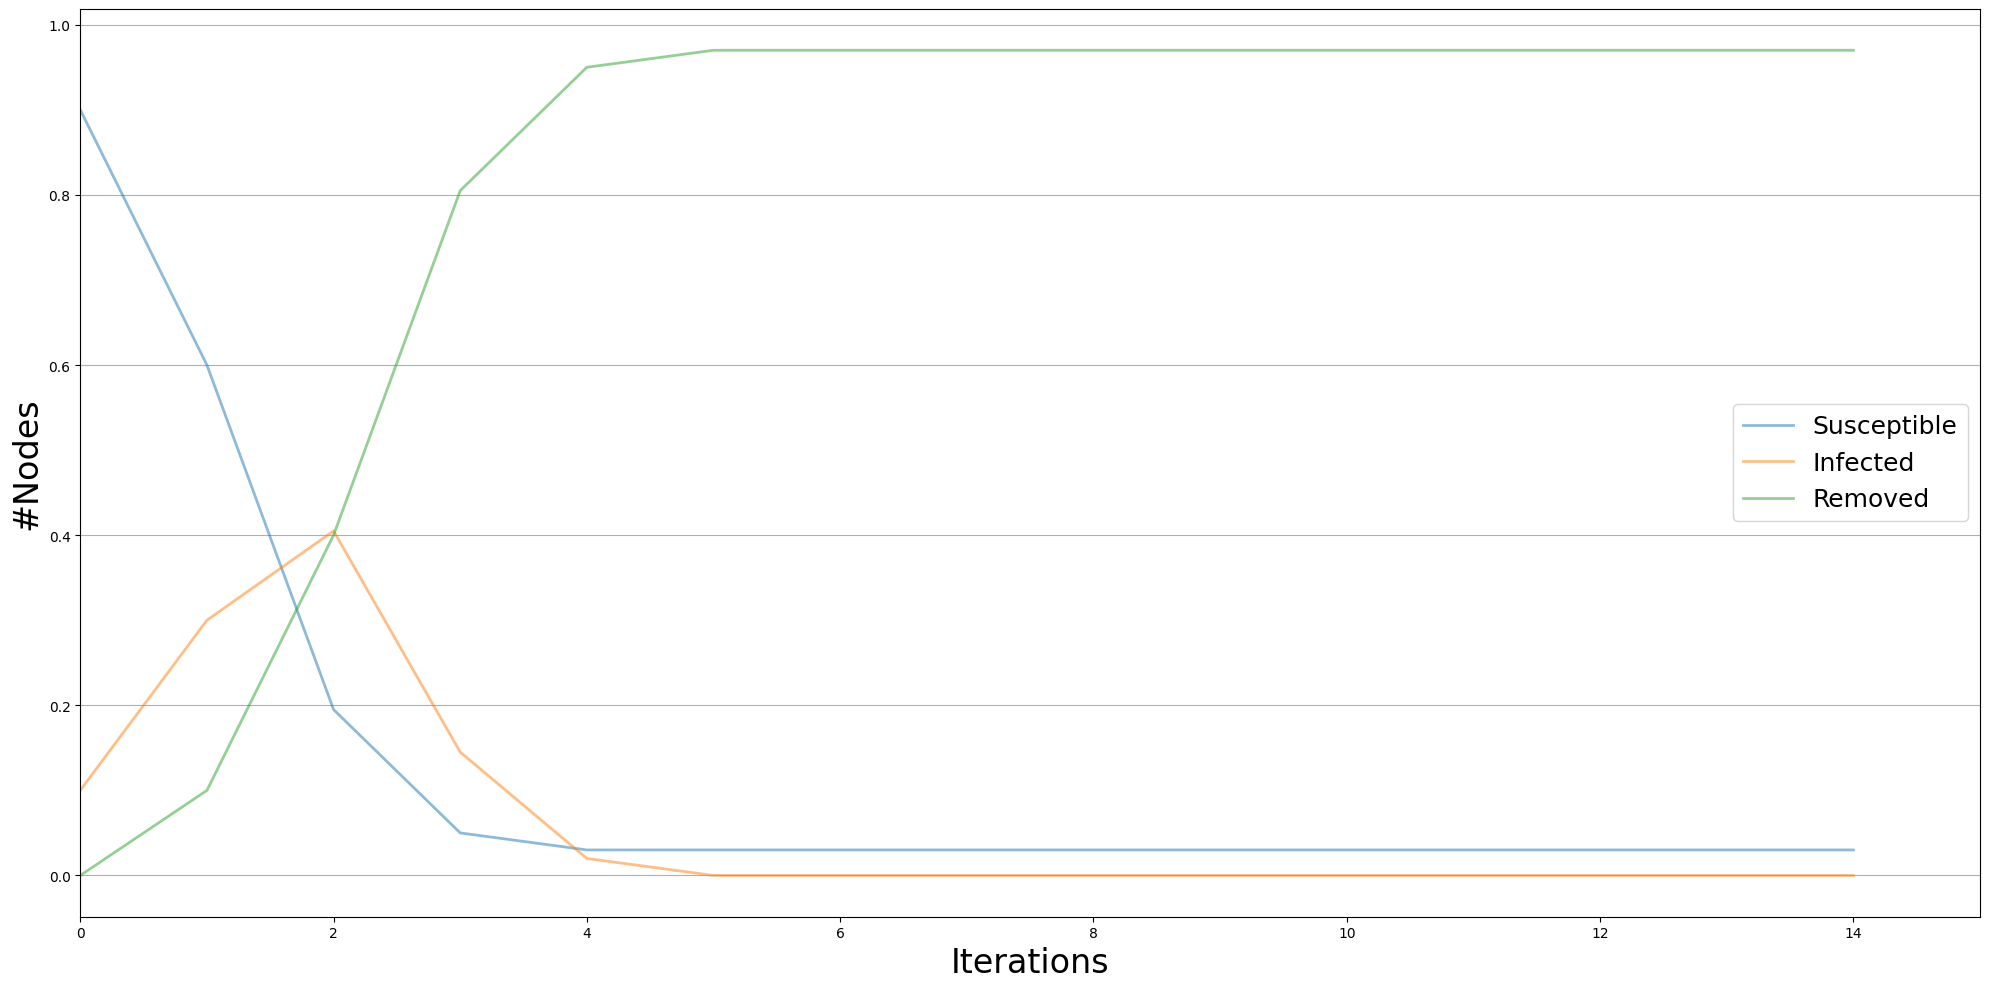

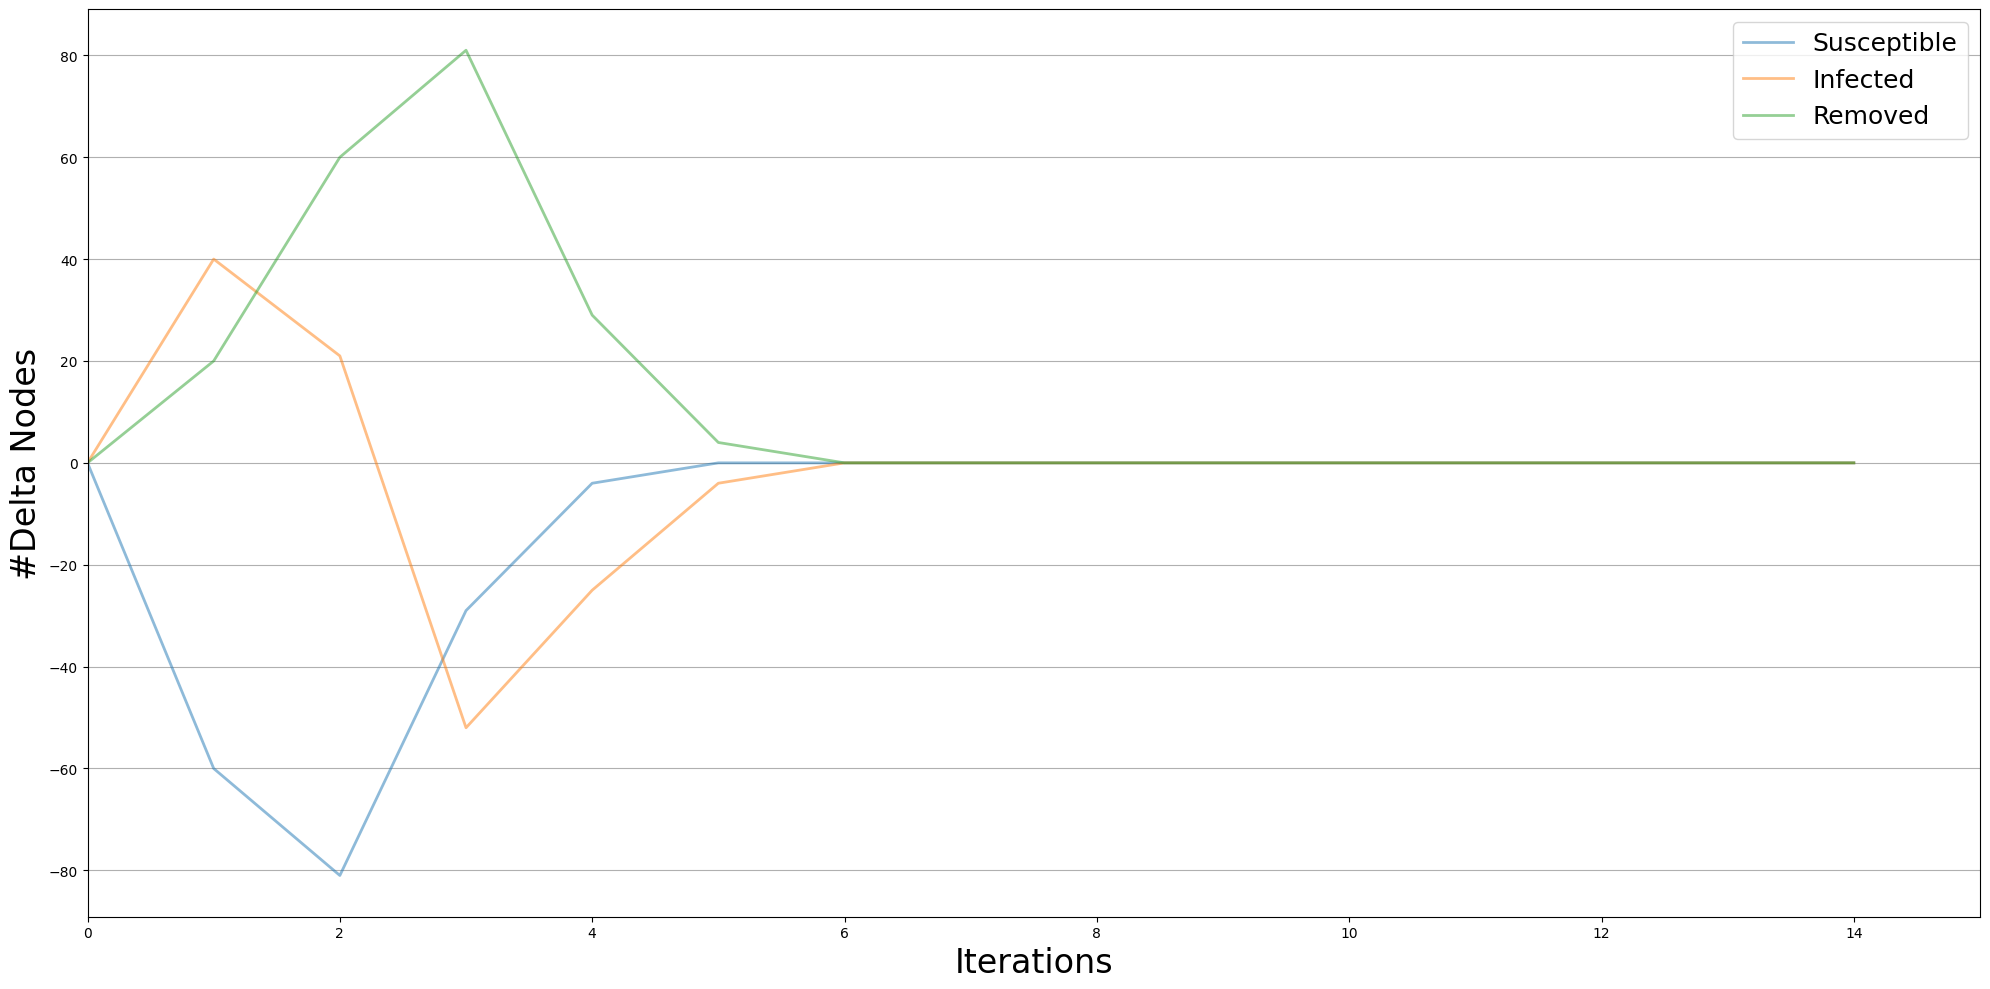

In [13]:
'''
Independent Cascades Model

This model starts with an initial set of active nodes A0: the diffusive process unfolds in discrete steps 
according to the following randomized rule:

- When node v becomes active in step t, it is given a single chance to activate each currently inactive 
  neighbor w; it succeeds with a probability p(v,w).
- If w has multiple newly activated neighbors, their attempts are sequenced in an arbitrary order.
- If v succeeds, then w will become active in step t + 1; but whether or not v succeeds, it cannot make 
  any further attempts to activate w in subsequent rounds.
- The process runs until no more activations are possible.

Statuses:
- 0: Susceptible 
- 1: Infected
- 2: Removed - a node becomes removed after he tries to activate (infect) all his neighbors

Parameters:
- edge_threshold: the probability that a node will activate its neighbor

Initial Status:
 - fraction_infected: the fraction of initially infected nodes
 
1. Attivazione iniziale: Inizia con un insieme iniziale di nodi "attivi" (infetti), che rappresentano la fonte della diffusione.

2. Tentativo di attivazione: In ogni iterazione, ogni nodo appena diventato infetto (attivo) ha la possibilità di provare ad 
   attivare (infettare) ciascuno dei suoi vicini suscettibili.
   
3. Probabilità di attivazione: La riuscita dell'attivazione dipende da una probabilità specifica per ogni coppia nodo attivo-nodo 
   vicino suscettibile. Questa probabilità può dipendere da fattori come la forza del legame tra i nodi o la credibilità del nodo attivo.
   
4. Tentativi sequenziali: Se ci sono più nodi attivi che tentano di attivare lo stesso nodo suscettibile, i tentativi avvengono in un ordine casuale.

5. Attivazione riuscita: Se il tentativo di attivazione ha successo, il nodo suscettibile diventa infetto nell'iterazione successiva.

6. Limite di tentativi: Un nodo attivo ha una sola possibilità di provare ad attivare un suo vicino suscettibile. Se il tentativo fallisce,
   iterations non potrà più riprovare in iterazioni future.
   
7. Fine del processo: La diffusione termina quando non è più possibile attivare nessun altro nodo suscettibile.

N.B -------------------------
Differenza con il SIR sta nel fatto che nel SIR un nodo infetto può infettare un nodo suscettibile con una probabilità fissa, mentre
nell'IC un nodo infetto può attivare un nodo suscettibile con una probabilità variabile.

La differenza tra edge e node threshold sta nel fatto che se un nodo ha un edge_treshold allora si indica la probabiltà con cui il nodo infetta i suoi vicini.
Per node_treshold si intenede la percetuale di vicini infetti che il nodo deve avere per poter essere infettato.

Domande:
- Quando un nodi diventa rimosso?
'''


import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json


# Network topology
g = nx.erdos_renyi_graph(200, 0.1)

# Model selection
model = ep.IndependentCascadesModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

# Setting the edge parameters
threshold = 0.2
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(15)
print(json.dumps(iterations, indent=2))
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()
